<h1> Customer Segmentation Menggunakan K-Means Clustering </h1>

Pada kali ini, saya akan melakukan Customer Segmentation dengan Menggunakan K-Means Clustering. Adapun tujuan melakukan Customer Segmentation ini adalah untuk mencoba memahami pelanggan dan memisahkan mereka dalam kelompok yang berbeda sesuai dengan preferensi mereka, dan setelah pembagian selesai, informasi ini dapat dipelajari dalam merencanakan strategi untuk melakukan suatu pemasaran yang sesuai.

Sebelum itu, kita import terlebih dahulu library yang dibutuhkan:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

Pandas & numpy : Digunakan untuk membantu dalam membaca dan mengeksplorasi data, dan menjalankan operasi perhitungan juga.
Seaborn & matplotlib : Membantu dalam menyusun informasi sehingga data dapat divisualisasikan agar data mudah dipahami.
sklearn : membantu dalam mengolah data yang akan disegmentasikan.
mplot3d : digunakan untuk membuat clustering dalam bentuk 3d.

<h2> Eksplorasi Data </h2>

In [72]:
df = pd.read_csv('Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


data yang ditampilkan berisi 200 customer dengan perilaku yang berbeda-beda dalam melakukan transaksi jual beli, seperti gender mereka, berapa pendapatan atau gaji mereka, dan berapa banyak pengeluaran mereka. Pada pendapatan, di tetapkan dengan (k$), sedangkan pada pengeluaran, menggunakan scala score 1-100,hal ini dilakukan agar mudah dipahami dalam melakukan clustering nanti.

Sebelum itu, saya membersihkan datanya terlebih dahulu dengan mencari null:

In [73]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Pada informasi tersebut, nullnya tidak ada, sehingga data bisa untuk digunakan.

Berikutnya, saya menghapus column 'CustomerID', karena tidak terlalu dibutuhkan.

In [74]:
df.drop(['CustomerID'], axis = 1, inplace = True)

Selanjutnya, saya mendeskripsi data untuk mengetahui mean, min, dan max pada data.

In [75]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


<h2> Visualisasi data </h2>

Sekarang datanya divisualisasi dan memplot informasi penting sehingga daoat melihat berbagai nilai yang dimiliki oleh data dan perilakunya. Untuk melakukannya, saya akan mempertimbangkan fitur-fitur berikut: Annual Income, Spending Score, dan Age. Gender hanya akan digunakan untuk melakukan pemisahan data sehingga kita dapat membedakan nilai laki-laki dan perempuan.

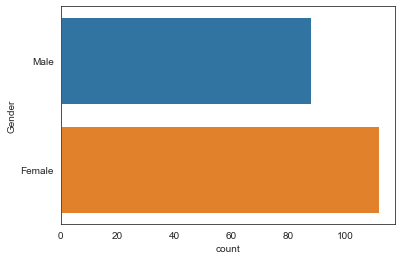

<Figure size 720x288 with 0 Axes>

In [76]:
sns.countplot(y = 'Gender' , data = df)
plt.figure(figsize = (10,4))
plt.show()

Pada countplot diatas, dapat diketahui bahwa perempuan lebih dominan dalam melakukan transaksi jual beli.

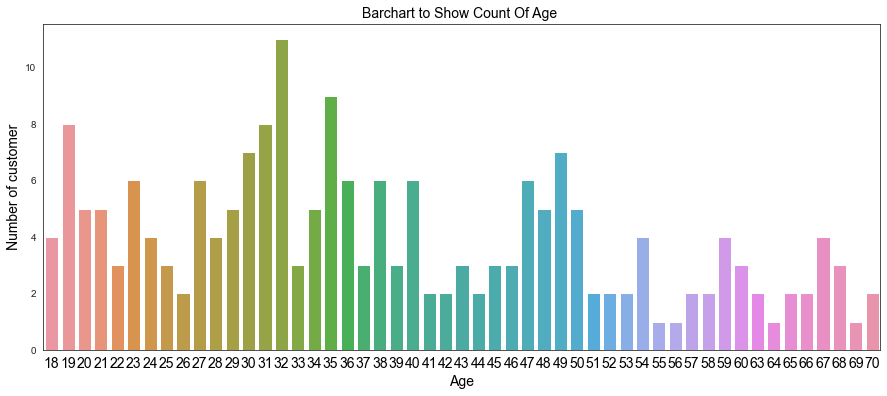

In [77]:
fig = plt.figure(figsize = (15,6))
Age = df.Age.value_counts()
plt.title("Barchart to Show Count Of Age ",fontsize = 14,color = "black")
plt.ylabel("Number of customer",fontsize = 14,color = 'black')
plt.xlabel("Age",fontsize = 14,color = 'black')
plt.xticks(fontsize = 14,color = 'black')
sns.barplot(x = Age.index, y = Age.values, data = df)
plt.show()

Pada barchat diatas, diperlihatkan bahwa customer yang paling banyak berumur 32 tahun, sedangkan yang paling sedikit ialah 55,56,64,dan 69 tahun.

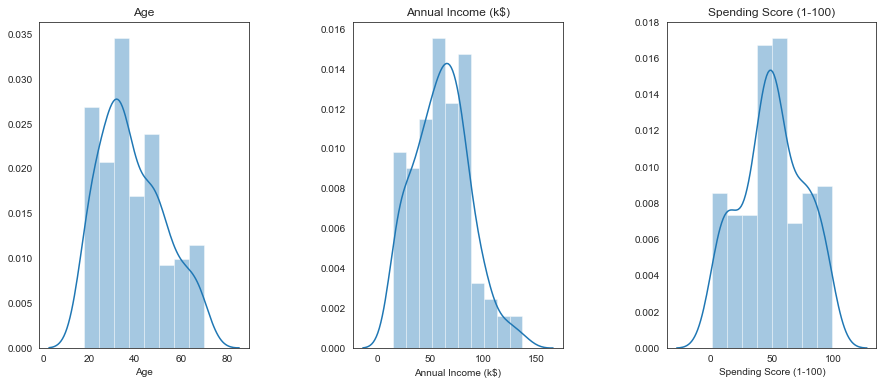

In [78]:
plt.figure(1 , figsize = (15 , 6))
n = 0 

#List of graphs
for x in ['Age', 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[x])
    plt.title('{}'.format(x))
plt.show()

Dari apa yang di lihat di sini, costumernya terkonsentrasi pada orang-orang dari usia 20 - 40 tahun, dengan pendapatan dari 20 - 70k, dan skor pengeluarannya 50.

Selanjutnya adalah melihat beberapa hubungan antara variabel yang berbeda dan mengekstrak beberapa informasi penting sebelum proses clustering berlangsung.

<h4> Age dan Annual Income </h4>

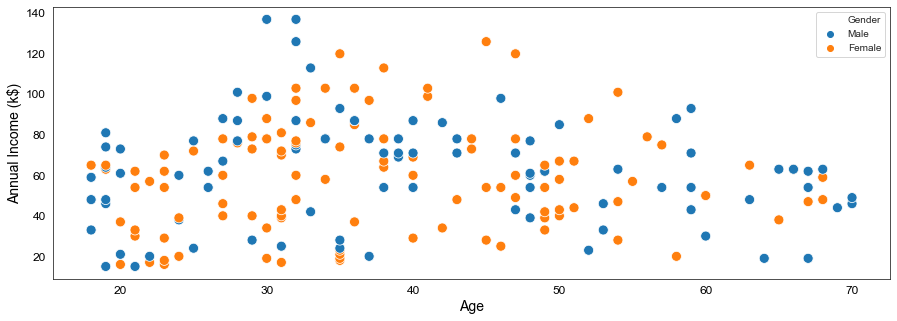

In [79]:
sns.set_style("white")
fig = plt.figure(figsize = (15,5))
sns.scatterplot(x = df["Age"],y = df["Annual Income (k$)"],  data = df, hue = "Gender", color = 'blue',s = 100)
plt.ylabel("Annual Income (k$)",fontsize = 14,color = "black")
plt.xlabel("Age",fontsize = 14,color = "black")
plt.xticks(fontsize = 12,color = "black")
plt.yticks(fontsize = 12,color = "black")
plt.show()

Pada informasi di atas, diperlihatkan bahwa customer yang di usia 30-an sampai 50-an mendapatkan penghasilan yang lebih banyak. Bisa disimpulkan bahwa di usia tersebut customer memiliki pekerjaan yang baik karena mereka mungkin mempunyai pengalaman dalam pekerjaan. Disini juga diperlihatkan bahwa rata-rata laki-laki memiliki pendapatan yang lebih banyak dari perempuan.

<h4> Spending Score dan Annual Income </h4>

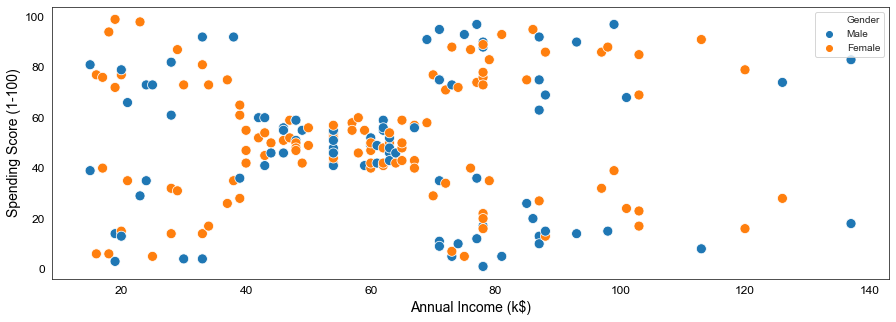

In [80]:
sns.set_style("white")
fig = plt.figure(figsize = (15,5))
sns.scatterplot(x = df["Annual Income (k$)"],y = df["Spending Score (1-100)"],  data = df, hue = "Gender", color = 'blue',s = 100)
plt.ylabel("Spending Score (1-100)",fontsize = 14,color = "black")
plt.xlabel("Annual Income (k$)",fontsize = 14,color = "black")
plt.xticks(fontsize = 12,color = "black")
plt.yticks(fontsize = 12,color = "black")
plt.show()

Pada informasi diatas, diperlihatkan bahwa pendapatan dan pengeluaran pada laki-laki dan perempuan hampir seimbang, dimana rata-rata customer yang memiliki pendapatan yang lumayan atau di tengah mempunyai pengeluaran yang lumayan juga.

<h4> Age dan Spending Score </h4>

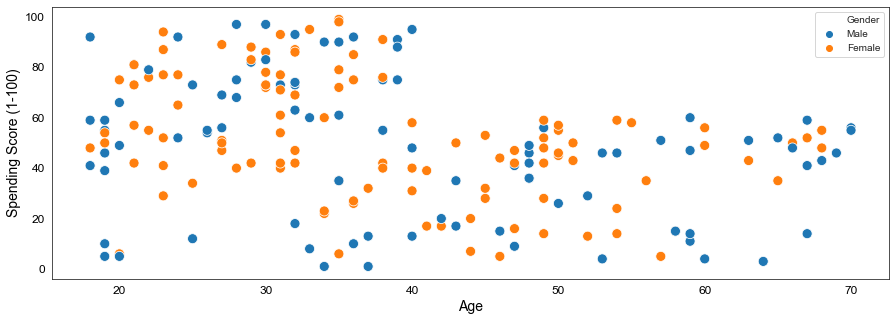

In [81]:
sns.set_style("white")
fig = plt.figure(figsize = (15,5))
sns.scatterplot(x = df["Age"],y = df["Spending Score (1-100)"],  data = df, hue = "Gender", color = 'blue',s = 100)
plt.ylabel("Spending Score (1-100)",fontsize = 14,color = "black")
plt.xlabel("Age",fontsize = 14,color = "black")
plt.xticks(fontsize = 12,color = "black")
plt.yticks(fontsize = 12,color = "black")
plt.show()

Pada informasi di atas, diperlihatkan bahwa rata-rata orang di usia 20-an sampai 40-an cenderung memiliki pengeluaran yang lebih besar dibanding usia 40 keatas. Hal ini bisa disimpulkan kalau customer yang lebih muda cenderung mempunyai kebutuhan yang lebih banyak dibanding customer yang usianya lebih tua.

<h2> CLustering Data </h2>

Setelah data divisualisasi, selanjutnya adalah mengkelompokkan data tersebut menjadi beberapa cluster. pada data ini, saya menggunakan metode k_means.

Untuk menentukan optimal K nya, saya menggunakan Silhouette Method, dan hasilnya menjadi seperti ini:

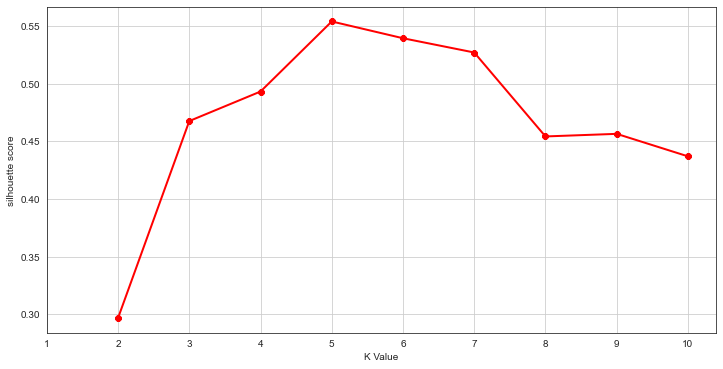

In [82]:
X=df.iloc[:,2:].values
sil = []
for k in range (2, 11):
  kmeans = KMeans(n_clusters = k).fit(X)
  labels = kmeans.labels_
  sil.append(silhouette_score(X, labels, metric = 'euclidean'))
  
plt.figure(figsize = (12,6))    
plt.grid()
plt.plot(range(2, 11),sil, linewidth = 2, color = "red", marker = "8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("silhouette score")
plt.show()

Berdasarkan grafik diatas, maka dapat diketahui bahwa optimal k yang cocok adalah 5.

In [83]:
km = KMeans(n_clusters = 5,init='k-means++', max_iter = 300, n_init = 10, random_state=0)
y_means = km.fit_predict(X)
df['label'] = y_means
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,Male,19,15,39,3
1,Male,21,15,81,1
2,Female,20,16,6,3
3,Female,23,16,77,1
4,Female,31,17,40,3


Setelah selesai, maka data yang telah dikelompokkan kemudian di visualisasikan.

<h4> Spending Score dan Annual Income (2D) </h4>

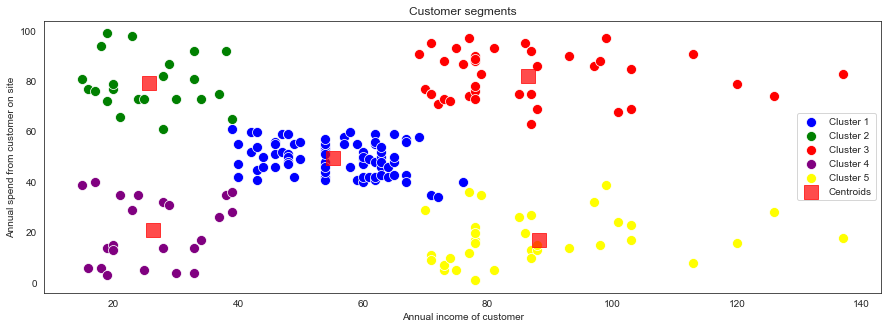

In [84]:
df_label0 = df[df['label']==0]
df_label1 = df[df['label']==1]
df_label2 = df[df['label']==2]
df_label3 = df[df['label']==3]
df_label4 = df[df['label']==4]


fig = plt.figure(figsize = (15,5))

sns.scatterplot(x = df_label0["Annual Income (k$)"], y = df_label0["Spending Score (1-100)"], color = 'blue'  , s = 100,label = 'Cluster 1')
sns.scatterplot(x = df_label1["Annual Income (k$)"], y = df_label1["Spending Score (1-100)"], color = 'green' , s = 100,label = 'Cluster 2')
sns.scatterplot(x = df_label2["Annual Income (k$)"], y = df_label2["Spending Score (1-100)"], color = 'red'   , s = 100,label = 'Cluster 3')
sns.scatterplot(x = df_label3["Annual Income (k$)"], y = df_label3["Spending Score (1-100)"], color = 'purple', s = 100,label = 'Cluster 4')
sns.scatterplot(x = df_label4["Annual Income (k$)"], y = df_label4["Spending Score (1-100)"], color = 'yellow', s = 100,label = 'Cluster 5')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],s=200,marker='s', c = 'red', alpha = 0.7, label = 'Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()
plt.show()


<h4> Spending Score, Annual Income, dan Age (3D) </h4>

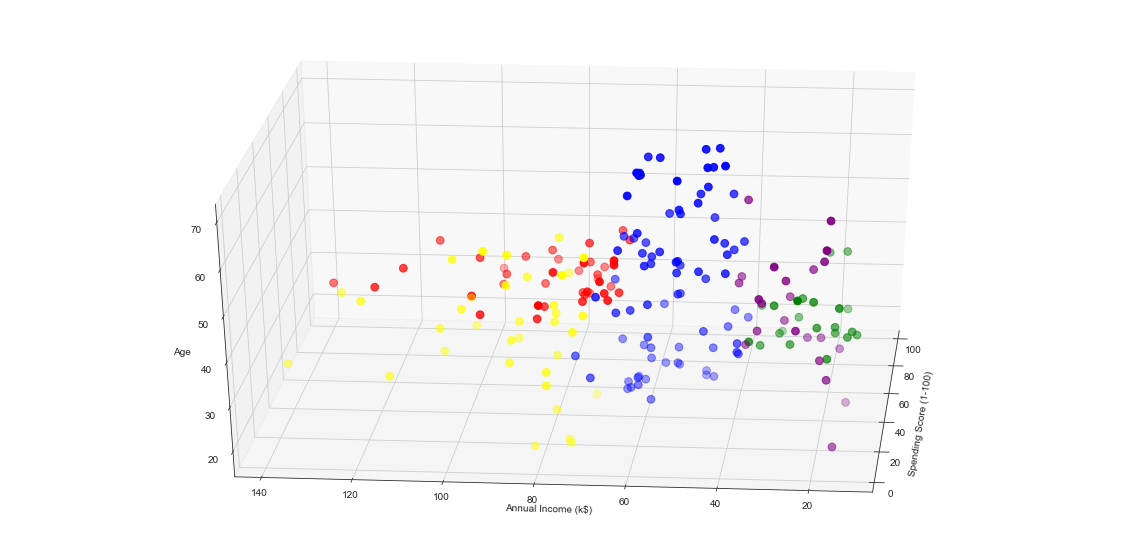

In [90]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection ='3d')
ax.scatter(df["Spending Score (1-100)"][df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Age"][df.label == 0], c='blue', s=60, label = 'Cluster 1')
ax.scatter(df["Spending Score (1-100)"][df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Age"][df.label == 1], c='green', s=60, label = 'Cluster 2')
ax.scatter(df["Spending Score (1-100)"][df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Age"][df.label == 2], c='red', s=60, label = 'Cluster 3')
ax.scatter(df["Spending Score (1-100)"][df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Age"][df.label == 3], c='purple', s=60, label = 'Cluster 4')
ax.scatter(df["Spending Score (1-100)"][df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Age"][df.label == 4], c='yellow', s=60, label = 'Cluster 5')
ax.view_init(30, 185)
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel("Age")
plt.show()

Pada kedua Chart diatas, dapat disimpulkan:

Cluster 1: pendapatan dan pengeluaran mereka hampir sama rata, tidak terlalu tinggi dan tidak terlalu rendah. Ini terjadi pada semua umur.

Cluster 2: customer yang berusia muda cenderung memiliki pendapatan yang rendah, namun pengeluarannya besar. 

Cluster 3: customer ini mempunyai pendapatan yang lumayan dan pengeluaran yang tinggi, terjadi pada customer usia muda

Cluster 4: customer ini cenderung mempunyai pendapatan yang sedikit, dan pengeluaran yang sedikit juga. Ini terjadi pada customer semua umur.

Cluster 5: customer ini mempunyai pendapatan yang lumayan tinggi, namun pengeluaran yang rendah. Terdapat pada customer yang berusia 30-an sampai 60-an.